# ================================
# SVM with Python Tutorial and Examples
# ================================

# Preliminaries

This command implements Python 3 style print if you are using Python 2.

In [2]:
from __future__ import print_function

This notebook command means that plots will be displayed in this notebook.

In [3]:
%matplotlib inline

## Modules to Import

"sklean" is scikit-learn, a popular Python module that implements many machine learning technqiues.  We import the part that implements support vector machines

In [4]:
from sklearn import svm

"numpy" is a module that helps do numerical calculations involving vectors and arrays very quickly

In [5]:
import numpy as np

"matplotlib" is a module for making plots.  The plotting part is in matplotlib.pyplot

In [6]:
import matplotlib.pyplot as plt

## Set Parameters for Making Plots

Change the string on the right hand side of the instruction below to the directory where you want to put the plot you make.  If you leave it as "", the plots will go in the current working directory.

In [7]:
plots_directory = ""

Change the size of plots to be twice as big as default values.  This helps make sure that the plots have high resolution and are large when displayed in this notebook.  Feel free to play with these values.

In [8]:
plt.rcParams['figure.figsize'] = [12., 8.]

Change the fontsize to be much larger (to go along with larger figure size.)  Feel free to play with this value.

In [9]:
plt.rcParams['font.size'] = 24.

# "Vanilla" SVM Circle

In [10]:
number_of_points     = 3000
number_of_dimensions = 2
xy_max = 1.5

points = 2 * xy_max * np.random.random(size = (number_of_points, number_of_dimensions)) - xy_max

We set the labels to have a parabolic boundary

In [11]:
labels = np.where(points[:,0]**2 + points[:,1]**2 > 1, 1, -1)

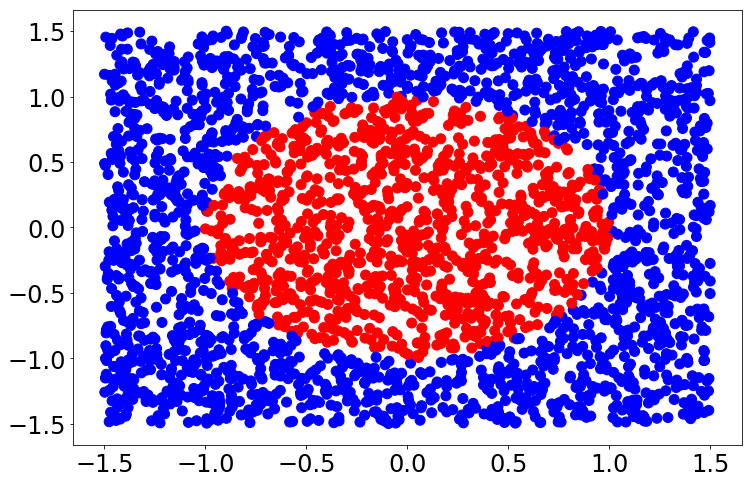

In [12]:
plt.scatter(points[:,0], points[:,1], s = 100, c = ["blue" if label == 1 else "red" for label in labels])

## Linear Fail

We start by failing to classify the points using a linear SVM.

In [13]:
our_linear_svm = svm.SVC(kernel = 'linear', C=1.0).fit(points, labels)
our_linear_svm.coef_

array([[  6.61876027e-06,   4.39483647e-06]])

In [14]:
def SVM_success_report(svm, points, labels):
    prediction = svm.predict(points)
    print("SVM Fit works for", sum(prediction == labels), "out of",
          len(labels), "points.")

In [15]:
SVM_success_report(our_linear_svm, points, labels)

SVM Fit works for 1951 out of 3000 points.


To make sure it is not an issue with the value of C (see notebook 2), we loop over C and print the results.

In [16]:
for C in [1e-2, 1., 1e2]:
    print(C)
    our_linear_svm = svm.SVC(kernel = 'linear', C=C).fit(points, labels)
    SVM_success_report(our_linear_svm, points, labels)
    print()

0.01
SVM Fit works for 1951 out of 3000 points.

1.0
SVM Fit works for 1951 out of 3000 points.

100.0
SVM Fit works for 1951 out of 3000 points.



In [17]:
sum(labels == np.ones_like(labels))

1951

So the SVM predicts +1 for all of the points.  This is right when +1 is the actual label, wrong otherwise.

## Quadratic SVM

In [18]:
our_quadratic_svm = svm.SVC(kernel = 'poly', degree = 2, C=1e2).fit(points, labels)

It works for a big number of points.

In [19]:
SVM_success_report(our_quadratic_svm, points, labels)

SVM Fit works for 2992 out of 3000 points.


If it doesn't work for a few points (because of an insufficient value of C), then these are the points that don't work

In [20]:
fail_mask = (our_quadratic_svm.predict(points) != labels)
fail_labels = labels[fail_mask]
fail_points = points[fail_mask]
(fail_points, np.sqrt(fail_points[:,0]**2 + fail_points[:,1]**2), fail_labels, 
 our_quadratic_svm.predict(fail_points))

(array([[-0.99313142,  0.12606028],
        [-0.94453172, -0.33356828],
        [-0.381456  ,  0.92417649],
        [ 0.8599006 , -0.51730072],
        [-0.53826162,  0.84287764],
        [ 0.96738763,  0.2548896 ],
        [-0.86452263, -0.50283223],
        [-0.05128772,  0.99622032]]),
 array([ 1.0011    ,  1.00170254,  0.99980541,  1.00350839,  1.00008414,
         1.00040368,  1.00011981,  0.99753965]),
 array([ 1,  1, -1,  1,  1,  1,  1, -1]),
 array([-1, -1,  1, -1, -1, -1, -1,  1]))

We miss one point because C is not sufficiently high.  The plot looks like.

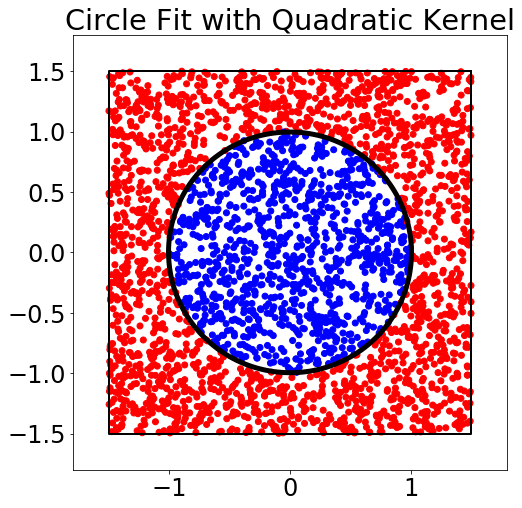

In [21]:
plot_name = 'circle_fit_with_quadratic_kernel'
plot_svm = our_quadratic_svm
title = 'Circle Fit with Quadratic Kernel'
plot_points = points
plot_labels = labels
n_points_in_plotting_grid_1D = 100
N = n_points_in_plotting_grid_1D

boundary_x = [xy_max, xy_max, -xy_max, -xy_max, xy_max]
boundary_y = [xy_max, -xy_max, -xy_max, xy_max, xy_max]

x = np.linspace(-1. * xy_max, 1. * xy_max, N)
y = np.linspace(-1. * xy_max, 1. * xy_max, N)

X,Y = np.meshgrid(x,y)

Z = plot_svm.decision_function(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

# Uncomment out to show multiple contours of decision function
#contour_plot = plt.contour(X, Y, Z, colors = 'black')
#plt.clabel(contour_plot)
contour_plot = plt.contour(X, Y, Z, [0], colors = 'black', linewidths = 5)

plt.plot(boundary_x, boundary_y, color = 'black', lw = 2)

plt.axis([-1.8, 1.8, -1.8, 1.8])
plt.axes().set_aspect('equal')

plt.scatter(plot_points[:,0], plot_points[:,1], color = ['red' if l == 1 else 'blue' for l in plot_labels])
plt.title(title)
if plots_directory != "":
    plt.savefig(plots_directory + '/' + plot_name + '.png')
else:
    plt.savefig(plot_name + '.png')

# Funky Shape with RBF

In [22]:
circ1_labels = np.where(((points[:,0]-0.6)**2 + points[:,1]**2) < 0.5, 1, -1)
circ2_labels = np.where(((points[:,0]+0.2)**2 + (points[:,1] - 0.4)**2) < 0.2, 1, -1)
circ3_labels = np.where(((points[:,0] + 0.5)**2 + (points[:,1] + 1.0)**2) < 0.1, 1, -1)

multi_circ_labels = np.where(circ1_labels + circ2_labels + circ3_labels == -3, -1, 1)

In [23]:
new_quadratic_svm = svm.SVC(kernel = 'poly', degree = 2, C=1e3).fit(points, multi_circ_labels)

In [24]:
SVM_success_report(new_quadratic_svm, points, multi_circ_labels)

SVM Fit works for 2452 out of 3000 points.


In [25]:
rbf_svm =  svm.SVC(kernel = 'rbf', C=1e7).fit(points, multi_circ_labels)

In [26]:
SVM_success_report(rbf_svm, points, multi_circ_labels)

SVM Fit works for 2998 out of 3000 points.


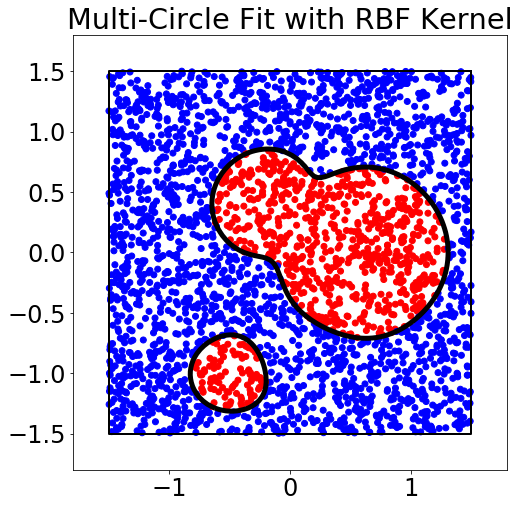

In [27]:
plot_name = 'multi_circle_fit_with_rbf_kernel'
plot_svm = rbf_svm
title = 'Multi-Circle Fit with RBF Kernel'
plot_points = points
plot_labels = multi_circ_labels
n_points_in_plotting_grid_1D = 100
N = n_points_in_plotting_grid_1D

boundary_x = [xy_max, xy_max, -xy_max, -xy_max, xy_max]
boundary_y = [xy_max, -xy_max, -xy_max, xy_max, xy_max]

x = np.linspace(-1. * xy_max, 1. * xy_max, N)
y = np.linspace(-1. * xy_max, 1. * xy_max, N)

X,Y = np.meshgrid(x,y)

Z = plot_svm.decision_function(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

# Uncomment out to show multiple contours of decision function
#contour_plot = plt.contour(X, Y, Z, colors = 'black')
#plt.clabel(contour_plot)
contour_plot = plt.contour(X, Y, Z, [0], colors = 'black', linewidths = 5)

plt.plot(boundary_x, boundary_y, color = 'black', lw = 2)

plt.axis([-1.8, 1.8, -1.8, 1.8])
plt.axes().set_aspect('equal')

plt.scatter(plot_points[:,0], plot_points[:,1], color = ['red' if l == 1 else 'blue' for l in plot_labels])
plt.title(title)
if plots_directory != "":
    plt.savefig(plots_directory + '/' + plot_name + '.png')
else:
    plt.savefig(plot_name + '.png')

# Overfitting

In [36]:
num_points = 50
sparse_points = 2 * xy_max * np.random.random(size = (num_points, 2)) - xy_max
random_labels = np.where(np.random.random(size = (num_points)) < 0.5, 1, -1)

In [37]:
new_rbf_svm =  svm.SVC(kernel = 'rbf', C=1e9).fit(sparse_points, random_labels)

In [38]:
SVM_success_report(new_rbf_svm, sparse_points, random_labels)

SVM Fit works for 50 out of 50 points.


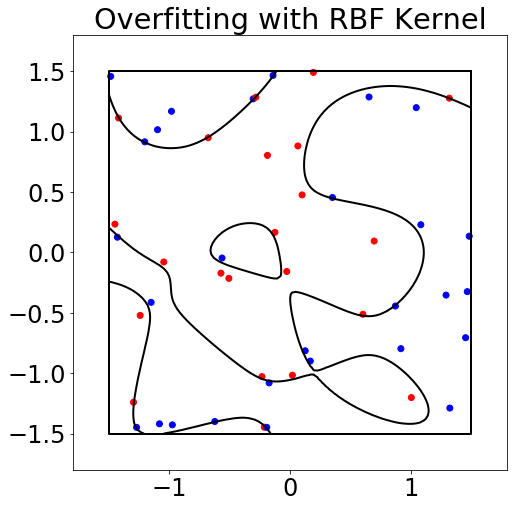

In [40]:
plot_name = 'overfitting_with_rbf_kernel'
plot_svm = new_rbf_svm
title = 'Overfitting with RBF Kernel'
plot_points = sparse_points
plot_labels = random_labels
n_points_in_plotting_grid_1D = 100
N = n_points_in_plotting_grid_1D

boundary_x = [xy_max, xy_max, -xy_max, -xy_max, xy_max]
boundary_y = [xy_max, -xy_max, -xy_max, xy_max, xy_max]

x = np.linspace(-1. * xy_max, 1. * xy_max, N)
y = np.linspace(-1. * xy_max, 1. * xy_max, N)

X,Y = np.meshgrid(x,y)

Z = plot_svm.decision_function(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

# Uncomment out to show multiple contours of decision function
#contour_plot = plt.contour(X, Y, Z, colors = 'black')
#plt.clabel(contour_plot)
contour_plot = plt.contour(X, Y, Z, [0], colors = 'black', linewidths = 2)

plt.plot(boundary_x, boundary_y, color = 'black', lw = 2)

plt.axis([-1.8, 1.8, -1.8, 1.8])
plt.axes().set_aspect('equal')

plt.scatter(plot_points[:,0], plot_points[:,1], color = ['red' if l == 1 else 'blue' for l in plot_labels])
plt.title(title)
if plots_directory != "":
    plt.savefig(plots_directory + '/' + plot_name + '.png')
else:
    plt.savefig(plot_name + '.png')